### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats
from scipy.stats import mannwhitneyu

C:\Users\johan\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
awal = pd.read_csv('./static/awal.csv')
awal.drop(['Unnamed: 0'],axis=1,inplace=True)
awal.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,country,day,character_length,last_time_open_email,last_time_open_shopee,last_time_checkout_shopee,open_frequency,login_frequency,checkout_frequency,coba1
0,4,2019-07-16,43,44,19.0,6.0,18.0,0,2,4,...,Philippines,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.044444,1.427778,0.111111,0
1,4,2019-07-16,102,44,9.0,4.0,8.0,2,9,17,...,Philippines,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.261111,1.633333,0.066667,0
2,6,2019-07-16,177,49,14.0,5.0,5.0,0,4,12,...,Thailand,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.111111,2.227778,0.527778,0
3,1,2019-07-16,184,49,49.0,9.0,53.0,0,0,1,...,Singapore,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.005556,0.938889,0.100000,0
4,6,2019-07-16,221,49,227.0,6.0,221.0,0,0,0,...,Thailand,Tuesday,ideal,0-1 year,0-1 year,0-1 year,0.000000,0.150000,0.000000,0


In [3]:
EDA = pd.read_csv('./static/EDA.csv')
EDA.drop(['Unnamed: 0'],axis=1,inplace=True)

# EDA

## 1. Target Variable

In [4]:
EDA.open_flag.value_counts(normalize=True)

0    0.844653
1    0.155347
Name: open_flag, dtype: float64

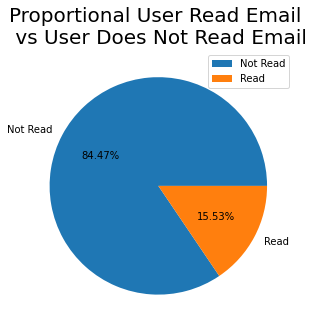

In [5]:
plt.figure(figsize=(10,5))
plt.pie(EDA['open_flag'].value_counts(), labels=['Not Read','Read'], autopct='%.2f%%')
plt.title('Proportional User Read Email \n vs User Does Not Read Email',fontsize=20)
plt.legend(loc='best')
plt.show()

Dari pie chart diatas, hanya ada 15% user yang membaca email promosi dari Shopee.

## 2. Day

In [6]:
day_name = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
read=[]
not_read=[]
for i in day_name:
    read.append(EDA[(EDA['day']==i) & (EDA['open_flag']==1)].count()['open_flag'])
    not_read.append(EDA[(EDA['day']==i) & (EDA['open_flag']==0)].count()['open_flag'])

day = pd.DataFrame()
day['day']=day_name
day['read_email']=read
day['not_read_email']=not_read
day['total']=day['read_email']+day['not_read_email']
day['read_ratio']=day['read_email']/day['total']*100

day

,day,read_email,not_read_email,total,read_ratio
0,Monday,2229,12263,14492,15.380900
1,Tuesday,2043,11541,13584,15.039753
2,Wednesday,1408,6681,8089,17.406354
3,Thursday,1789,9545,11334,15.784366
4,Friday,1682,8669,10351,16.249638
5,Saturday,652,4885,5537,11.775330
6,Sunday,1574,8275,9849,15.981318


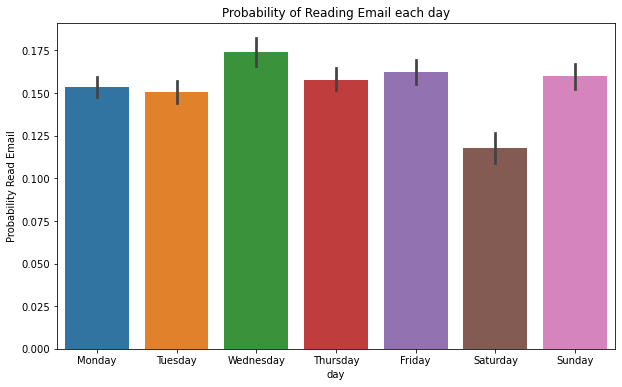

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'day', y ='open_flag', data = EDA,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Probability Read Email')
plt.title('Probability of Reading Email each day')
plt.show()

### Hipotesis to Prove Whether Saturday Ratio is Significanly Effecting the Result : Mann-Whitney U Test

In [8]:
day_except_saturday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday']

In [9]:
for i in day_except_saturday:
    stats, p = mannwhitneyu(day[day['day'] == 'Saturday']['read_ratio'], day[day['day'] == i]['read_ratio'])
    print(f'Comparison of Reading Email on Saturday compared on day {i} :')
    if p < 0.05:
        print(f'Comparison Ratio Reading Email on Saturday is Smaller Than Reading Email on {i}')
    else:
        print(f'Comparison Ratio Reading Email on Saturday is Same Compared to Reading Email on {i}')
    print('')
    

Comparison of Reading Email on Saturday compared on day Monday :
Comparison Ratio Reading Email on Saturday is Same Compared to Reading Email on Monday

Comparison of Reading Email on Saturday compared on day Tuesday :
Comparison Ratio Reading Email on Saturday is Same Compared to Reading Email on Tuesday

Comparison of Reading Email on Saturday compared on day Wednesday :
Comparison Ratio Reading Email on Saturday is Same Compared to Reading Email on Wednesday

Comparison of Reading Email on Saturday compared on day Thursday :
Comparison Ratio Reading Email on Saturday is Same Compared to Reading Email on Thursday

Comparison of Reading Email on Saturday compared on day Friday :
Comparison Ratio Reading Email on Saturday is Same Compared to Reading Email on Friday

Comparison of Reading Email on Saturday compared on day Sunday :
Comparison Ratio Reading Email on Saturday is Same Compared to Reading Email on Sunday



### From the result above, can concluded that the Reading Ratio on Saturday is the same and does not affecting the result compared to the other day

## 3. Age

In [10]:
EDA.isna().sum()

open_flag                        0
age                          28846
domain                           0
country                          0
day                              0
character_length                 0
last_time_open_email             0
last_time_open_shopee            0
last_time_checkout_shopee        0
open_frequency                   0
login_frequency                  0
checkout_frequency               0
dtype: int64

In [11]:
EDA['age'].median()

29.0

In [12]:
EDA['age'].fillna(EDA['age'].median(),inplace=True)

### Bining : 
1. Age 15-18 : high school
1. Age 18-25 : university
1. Age 25-35 : working
1. Age 35-55 : family
1. Age 55 above : elder

In [13]:
EDA['age_category']=pd.cut(EDA['age'],[14,18,25,35,55,90],labels=['high school','university','working','family','elder'])

In [14]:
EDA.isna().sum()

open_flag                    0
age                          0
domain                       0
country                      0
day                          0
character_length             0
last_time_open_email         0
last_time_open_shopee        0
last_time_checkout_shopee    0
open_frequency               0
login_frequency              0
checkout_frequency           0
age_category                 0
dtype: int64

C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


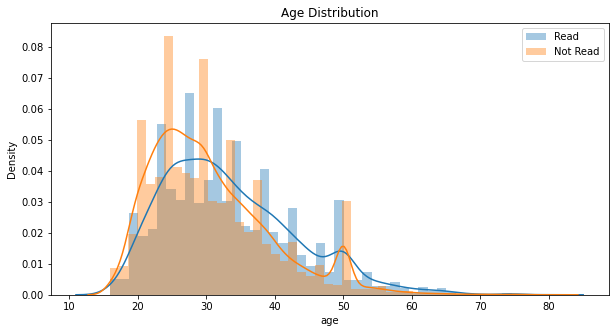

In [15]:
plt.figure(figsize=(10,5))
plt.title('Age Distribution')
sns.distplot(awal[awal['open_flag'] == 1]['age'], label='Read')
sns.distplot(awal[awal['open_flag'] == 0]['age'], label='Not Read')
plt.legend(loc= 'upper right')
plt.show()

In [16]:
df_age = awal[['open_flag', 'age']].groupby(['age'], as_index = False).mean().sort_values(by = 'open_flag', ascending = False)[:20]

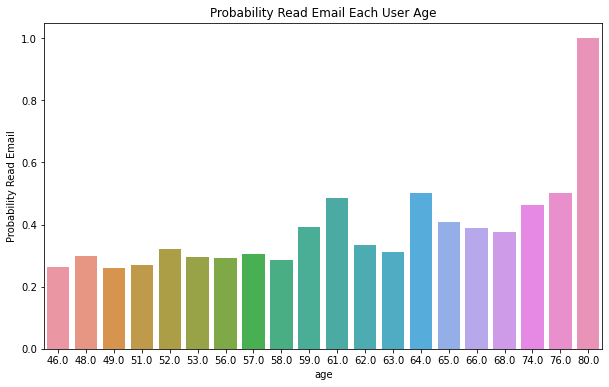

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'age', y ='open_flag', data = df_age)
plt.ylabel('Probability Read Email')
plt.title('Probability Read Email Each User Age')
plt.show()

### Categorizing Age as follow :

1. Age 15-18 : high school
1. Age 18-25 : university
1. Age 25-35 : working
1. Age 35-55 : family
1. Age 55 abpve : elder

In [18]:
EDA['age_category'].value_counts(normalize=True)*100

working        65.108690
university     17.576055
family         15.246600
high school     1.328582
elder           0.740073
Name: age_category, dtype: float64

In [19]:
age_cat = ['high school','university','working','family','elder']
read=[]
not_read=[]
for i in age_cat:
    read.append(EDA[(EDA['age_category']==i) & (EDA['open_flag']==1)].count()['open_flag'])
    not_read.append(EDA[(EDA['age_category']==i) & (EDA['open_flag']==0)].count()['open_flag'])

age = pd.DataFrame()
age['age_category']=age_cat
age['read_email']=read
age['not_read_email']=not_read
age['total']=age['read_email']+age['not_read_email']
age['read_ratio']=age['read_email']/age['total']*100

age

,age_category,read_email,not_read_email,total,read_ratio
0,high school,96,877,973,9.866393
1,university,1455,11417,12872,11.303605
2,working,7356,40327,47683,15.426882
3,family,2295,8871,11166,20.553466
4,elder,175,367,542,32.287823


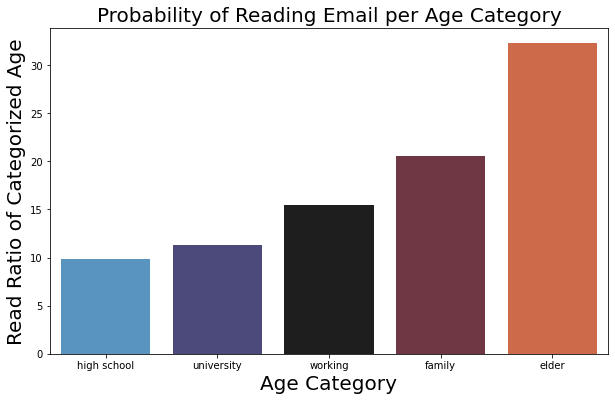

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'age_category', y ='read_ratio', data = age,order=['high school','university','working','family','elder'],palette='icefire')
plt.ylabel('Read Ratio of Categorized Age',fontsize=20)
plt.xlabel('Age Category',fontsize=20)
plt.title('Probability of Reading Email per Age Category',fontsize=20)
plt.show()


From the chart above, showed that 33 % of total elder is like to read promotion email

In [21]:
cat = EDA.groupby(['age_category'])
cat.count()['age']

age_category
high school      973
university     12872
working        47683
family         11166
elder            542
Name: age, dtype: int64

In [22]:
categ = pd.DataFrame([973,12872,47683,11166,542],index=['high school','university','working','family','elder'],columns=['jumlah'])
categ['ratio']=categ['jumlah']/73236*100
categ

,jumlah,ratio
high school,973,1.328582
university,12872,17.576055
working,47683,65.108690
family,11166,15.246600
elder,542,0.740073


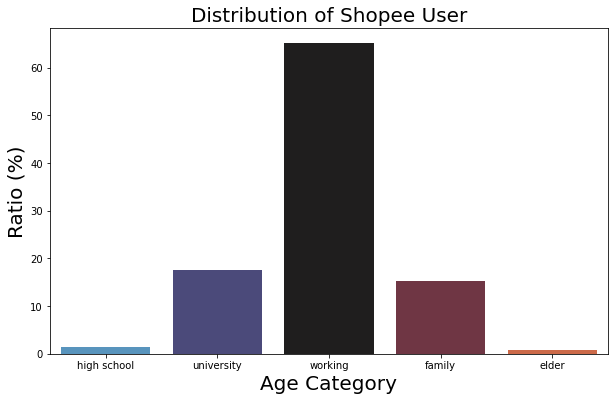

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x = categ.index, y ='ratio', data = categ,order=['high school','university','working','family','elder'],palette='icefire')
plt.ylabel('Ratio (%)',fontsize=20)
plt.xlabel('Age Category',fontsize=20)
plt.title('Distribution of Shopee User',fontsize=20)
plt.show()


1. From the barplot above, people in working age category has the highest sample number, but actually only 15% of total people in working age category that read the promotion email
1. 2/3 of Shopee's User are actually categorized as working

## 4. Last Open Email / Login Shopee / CheckOut Shopee

### After Categorizing

In [24]:
df_terakhir_buka_email= EDA[['open_flag', 'last_time_open_email']].groupby(['last_time_open_email'], as_index = False).mean().sort_values(by = 'open_flag', ascending = False)
df_terakhir_buka_shopee=EDA[['open_flag', 'last_time_open_shopee']].groupby(['last_time_open_shopee'], as_index = False).mean().sort_values(by = 'open_flag', ascending = False)
df_terakhir_belanja_shopee=EDA[['open_flag', 'last_time_checkout_shopee']].groupby(['last_time_checkout_shopee'], as_index = False).mean().sort_values(by = 'open_flag', ascending = False)

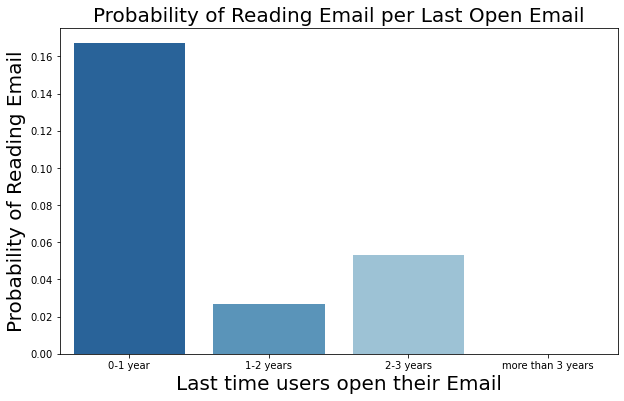

In [25]:
plt.figure(figsize=(10,6))

sns.barplot(x = 'last_time_open_email', y ='open_flag', data = df_terakhir_buka_email,order=['0-1 year','1-2 years','2-3 years','more than 3 years'],palette = 'Blues_r')
plt.ylabel('Probability of Reading Email',fontsize=20)
plt.xlabel('Last time users open their Email',fontsize=20)
plt.title('Probability of Reading Email per Last Open Email',fontsize=20)
plt.show()


User that still open the email frequently, is the user that has the biggest chance to read the promotion email from Shopee

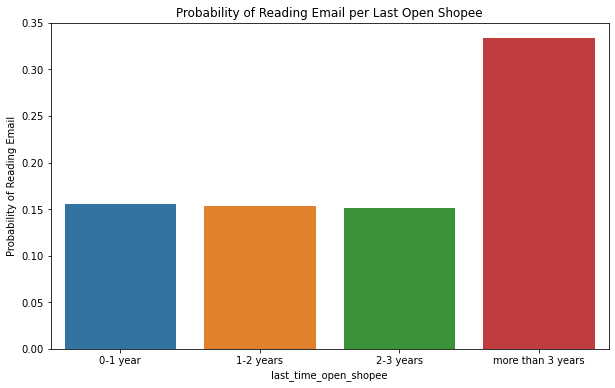

In [26]:
plt.figure(figsize=(10,6))

sns.barplot(x = 'last_time_open_shopee', y ='open_flag', data = df_terakhir_buka_shopee,order=['0-1 year','1-2 years','2-3 years','more than 3 years'])
plt.ylabel('Probability of Reading Email')
plt.title('Probability of Reading Email per Last Open Shopee')

plt.show()


User that has not open Shopee anymore is actually the one that likely to read promotion email from Shopee out of curiousity.

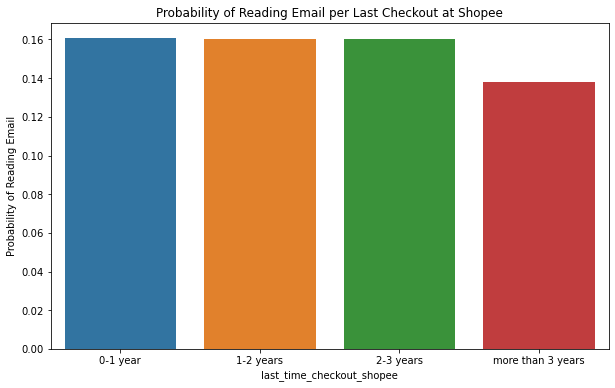

In [27]:
plt.figure(figsize=(10,6))

sns.barplot(x = 'last_time_checkout_shopee', y ='open_flag', data = df_terakhir_belanja_shopee,order=['0-1 year','1-2 years','2-3 years','more than 3 years'])
plt.ylabel('Probability of Reading Email')
plt.title('Probability of Reading Email per Last Checkout at Shopee')

plt.show()

Last Time Checkout did not give any significant result

## 5. Domain 

In [28]:
EDA['domain'].value_counts(normalize=True)*100

@gmail.com    85.246327
other          7.737998
@yahoo.com     7.015675
Name: domain, dtype: float64

In [29]:
df_domain= EDA[['open_flag', 'domain']].groupby(['domain'], as_index = False).mean().sort_values(by = 'open_flag', ascending = False)
df_domain

,domain,open_flag
2,other,0.292042
1,@yahoo.com,0.180810
0,@gmail.com,0.140843


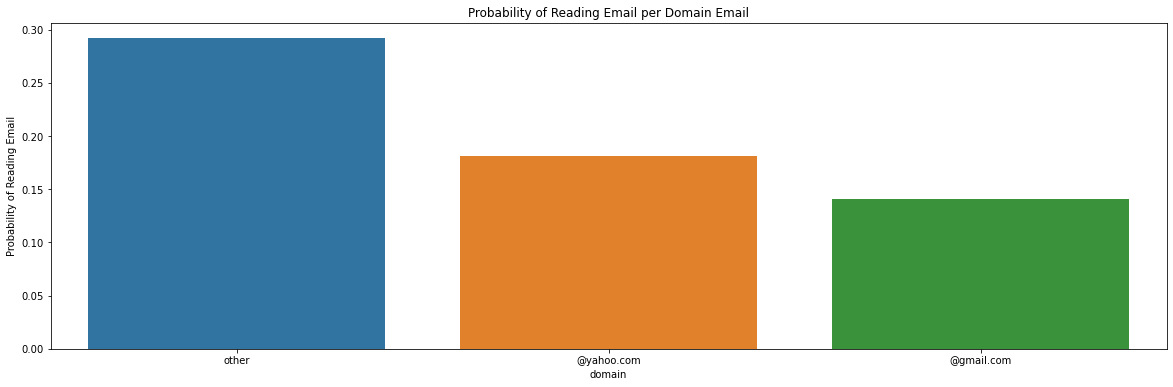

In [30]:
plt.figure(figsize=(20,6))

sns.barplot(x = 'domain', y ='open_flag', data = df_domain)
plt.ylabel('Probability of Reading Email')
plt.title('Probability of Reading Email per Domain Email')

plt.show()

Looks like other domain (which is only 7%) has the higher chance to read an email. Looks like people just make gmail or yahoo account for other purpose than reading promotion email

# 6. Frequency of Open Email, Login Shopee, and Checkout at Shopee

In [31]:
df_open_freq= EDA[['open_flag', 'open_frequency']].groupby(['open_frequency'], as_index = False).mean().sort_values(by = 'open_flag', ascending = False)
df_login_freq= EDA[['open_flag', 'login_frequency']].groupby(['login_frequency'], as_index = False).mean().sort_values(by = 'open_flag', ascending = False)
df_checkout_freq= EDA[['open_flag', 'checkout_frequency']].groupby(['checkout_frequency'], as_index = False).mean().sort_values(by = 'open_flag', ascending = False)

In [32]:
df_open_freq

,open_frequency,open_flag
161,0.550000,1.0
121,0.422222,1.0
238,0.777778,1.0
243,0.794444,1.0
245,0.800000,1.0
...,...,...
304,1.077778,0.0
261,0.861111,0.0
30,0.122222,0.0
321,2.038889,0.0


C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

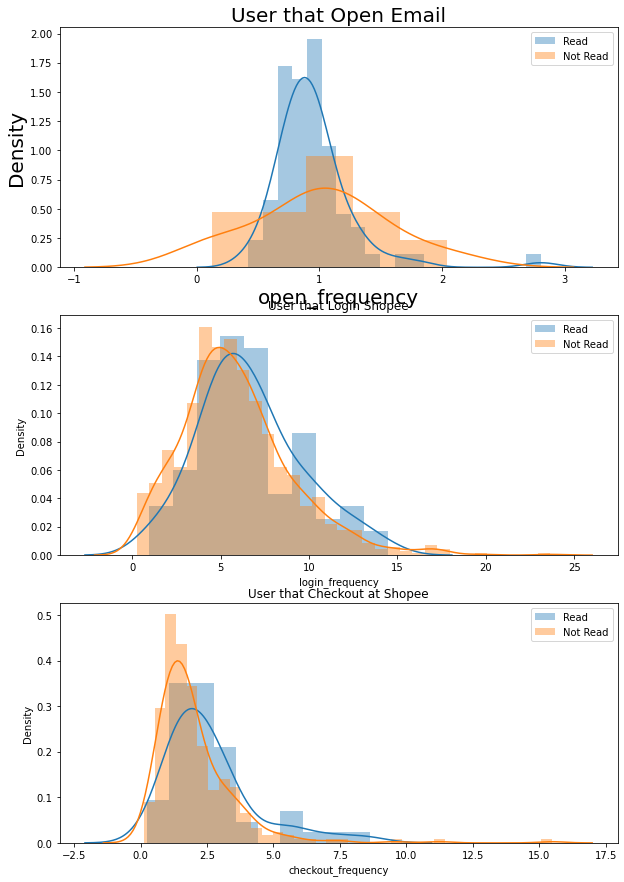

In [33]:
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.title('User that Open Email',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.xlabel('Open Email Frequency',fontsize=20)
sns.distplot(df_open_freq[df_open_freq['open_flag'] == 1]['open_frequency'], label='Read')
sns.distplot(df_open_freq[df_open_freq['open_flag'] == 0]['open_frequency'], label='Not Read')
plt.legend(loc= 'upper right')

plt.subplot(312)
plt.title('User that Login Shopee')
sns.distplot(df_login_freq[df_login_freq['open_flag'] == 1]['login_frequency'], label='Read')
sns.distplot(df_login_freq[df_login_freq['open_flag'] == 0]['login_frequency'], label='Not Read')
plt.legend(loc= 'upper right')

plt.subplot(313)
plt.title('User that Checkout at Shopee')
sns.distplot(df_checkout_freq[df_checkout_freq['open_flag'] == 1]['checkout_frequency'], label='Read')
sns.distplot(df_checkout_freq[df_checkout_freq['open_flag'] == 0]['checkout_frequency'], label='Not Read')
plt.legend(loc= 'upper right')
plt.show()

User that has the highest possibility of reading promotion Email from Shopee has average score of :
- Open 0.8-1.2 email per days

Both users that login in shopee and checkout in shopee has the same frequency, so that does not give any information

## 7. Country

In [34]:
df_country= EDA[['open_flag', 'country']].groupby(['country'], as_index = False).mean().sort_values(by = 'open_flag', ascending = False)
df_country

,country,open_flag
2,Philippines,0.352376
6,Vietnam,0.244435
5,Thailand,0.221981
4,Taiwan,0.215516
1,Malaysia,0.191204
0,Indonesia,0.131286
3,Singapore,0.081125


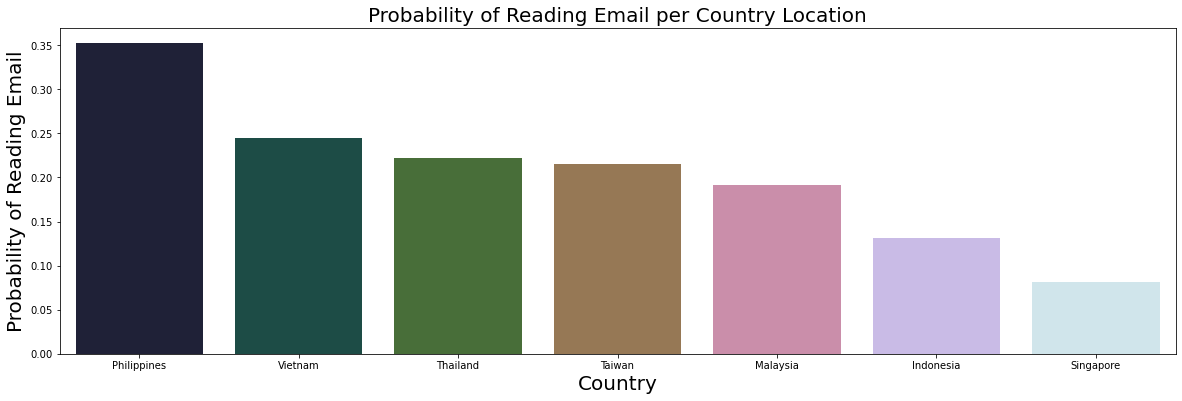

In [35]:
plt.figure(figsize=(20,6))

sns.barplot(x = 'country', y ='open_flag', data = df_country,palette='cubehelix')
plt.ylabel('Probability of Reading Email',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.title('Probability of Reading Email per Country Location',fontsize=20)
plt.show()


Country that has user that most likely to open email is Phillipines

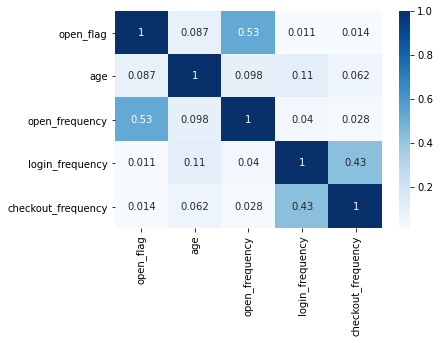

In [36]:
sns.heatmap(EDA.corr(),annot=True,cmap='Blues')
plt.show()

## 8. Boxplot to open_frequency

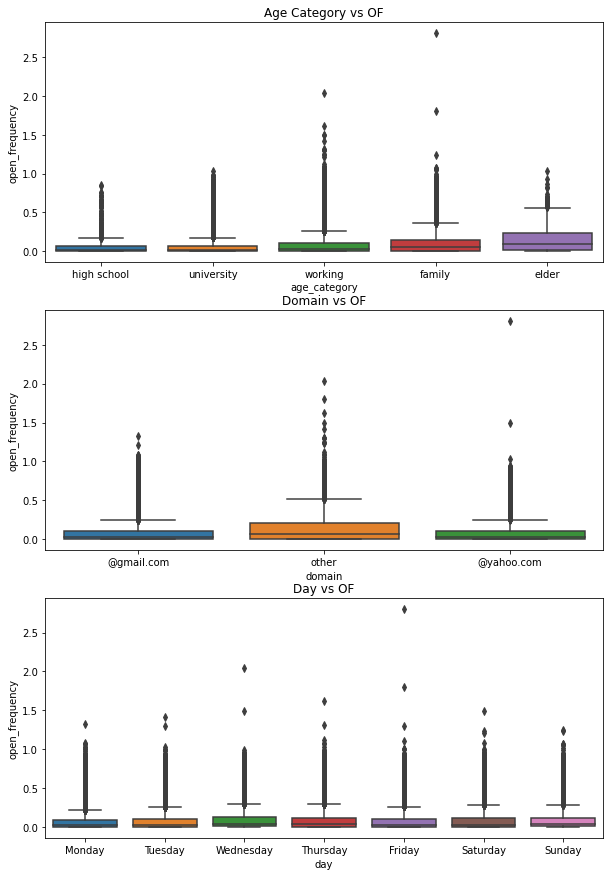

In [37]:
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.title('Age Category vs OF')
sns.boxplot(x='age_category', y='open_frequency', data=EDA)

plt.subplot(312)
plt.title('Domain vs OF')
sns.boxplot(x='domain', y='open_frequency', data=EDA)

plt.subplot(313)
plt.title('Day vs OF')
sns.boxplot(x='day', y='open_frequency', data=EDA, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.show()

- Age Category Elder, Email domain other, and Wednesday has the highest frequency of opening the email
- Looks like we have to see the criteria of the outliers, since every day, domain, and age category have their own outliers
- Other features need to make this data clearer (such as who is useing e-money for transaction and what e-money they used)